https://www.kaggle.com/code/akhilreddysalibindla/capstone-project#Decision-Tree-Regression
https://www.kaggle.com/code/devraai/flight-price-prediction-analysis
https://www.kaggle.com/code/kifayatullahe/flight-price-prediction-98-accuracy
https://medium.com/@amit25173/linear-regression-vs-random-forest-7288522be3aa

In [ ]:
import sys
!{sys.executable} -m pip install seaborn
!python -m pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
flight_df = pd.read_csv("merged_flights.csv")

In [ ]:
flight_df

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_legs,n_stops,avg_legroom,carbon_this,carbon_route_typ,carbon_diff_pct,delayed_any,layover_total_duration,days_to_departure,price_per_minute,price_per_leg,is_direct,avg_stop_duration
0,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 985,596,1390,2,1,31.000000,1094000,1000000,9,False,125,27,0.428777,298.0,0,125.0
1,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,602,1380,2,1,33.000000,1123000,1000000,12,False,275,27,0.436232,301.0,0,275.0
2,2025-05-14 16:47:50,2025-06-11,One way,Economy,CX 742,645,1315,2,1,31.000000,888000,1000000,-11,False,245,27,0.490494,322.5,0,245.0
3,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 983,596,1485,2,1,31.000000,966000,1000000,-3,False,220,27,0.401347,298.0,0,220.0
4,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,606,1591,3,2,31.666667,948000,1000000,-5,True,432,27,0.380893,202.0,0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CI 794,2967,1442,3,2,NaN,2973000,3983000,-25,True,250,13,2.057559,989.0,0,125.0
169,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CX 742,3112,1745,2,1,NaN,4053000,3983000,2,False,655,13,1.783381,1556.0,0,655.0
170,2025-05-14 16:45:32,2025-05-28,One way,Business Class,BR 398,3955,1260,2,1,NaN,4488000,3983000,13,False,195,13,3.138889,1977.5,0,195.0
171,2025-05-14 16:45:32,2025-05-28,One way,Business Class,OZ 730,3988,1235,2,1,NaN,3904000,3983000,-2,False,90,13,3.229150,1994.0,0,90.0


# Data Cleaning

In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   booking_date            173 non-null    object 
 1   travel_date             173 non-null    object 
 2   route_type              173 non-null    object 
 3   travel_class            173 non-null    object 
 4   flight_number           173 non-null    object 
 5   price                   173 non-null    int64  
 6   total_duration          173 non-null    int64  
 7   n_legs                  173 non-null    int64  
 8   n_stops                 173 non-null    int64  
 9   avg_legroom             93 non-null     float64
 10  carbon_this             173 non-null    int64  
 11  carbon_route_typ        173 non-null    int64  
 12  carbon_diff_pct         173 non-null    int64  
 13  delayed_any             173 non-null    bool   
 14  layover_total_duration  173 non-null    in

In [ ]:
# Convert to datetime type
flight_df["travel_date"] = pd.to_datetime(flight_df["travel_date"])
flight_df["booking_date"] = pd.to_datetime(flight_df["booking_date"])

In [ ]:
flight_df["n_stops"].value_counts()

,count
n_stops,
1,140
2,31
3,2


In [ ]:
cleaned_df = flight_df.drop(columns=["avg_legroom", "is_direct"])

# Feature Engineering

In [ ]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business Class']])
cleaned_df['class_encoded'] = encoder.fit_transform(cleaned_df[['travel_class']])

In [ ]:
cleaned_df[["class_encoded", "travel_class"]]

,class_encoded,travel_class
0,0.0,Economy
1,0.0,Economy
2,0.0,Economy
3,0.0,Economy
4,0.0,Economy
...,...,...
168,1.0,Business Class
169,1.0,Business Class
170,1.0,Business Class
171,1.0,Business Class


# Exploratory Data Analysis

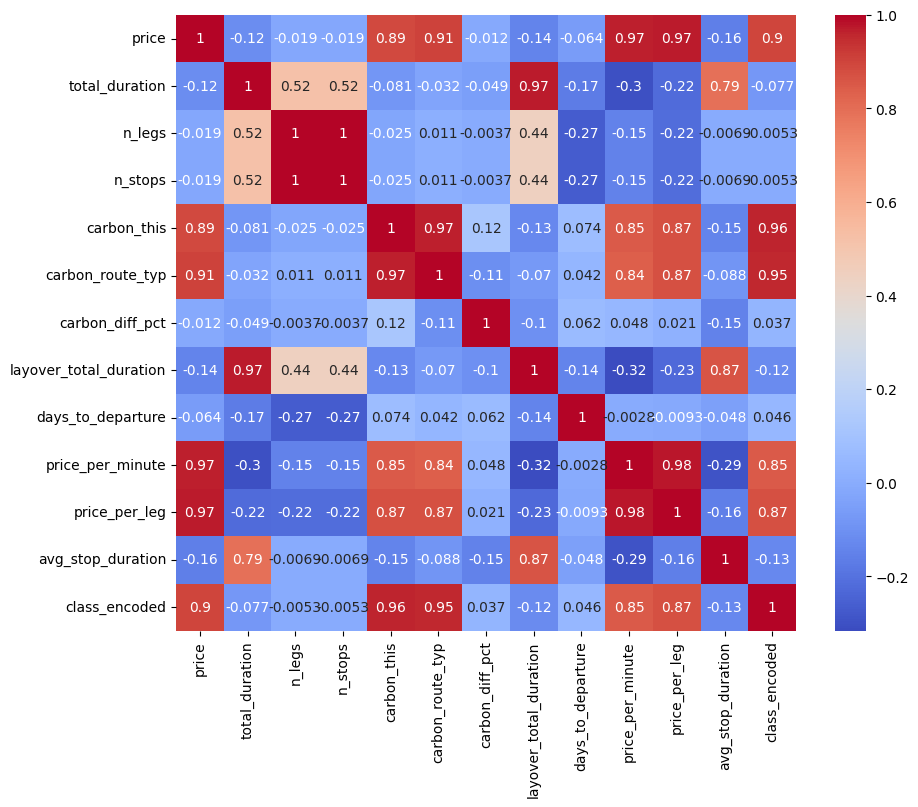

In [ ]:
numeric_features = cleaned_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm")
plt.show()

The number of transit connections generate a significant difference in prices of boarding passes. There are no much low cost flights so it is hard to make any insights.

<ipython-input-42-27c05dedaba1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='n_stops', y='price', palette='coolwarm')


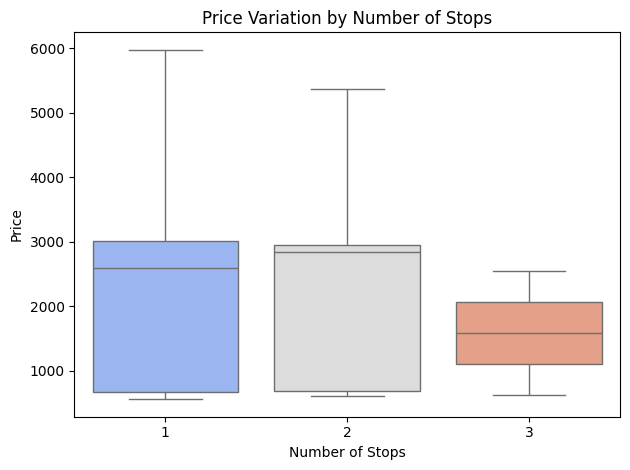

In [ ]:
sns.boxplot(data=cleaned_df, x='n_stops', y='price', palette='coolwarm')
plt.title('Price Variation by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Data Modelling

K-means

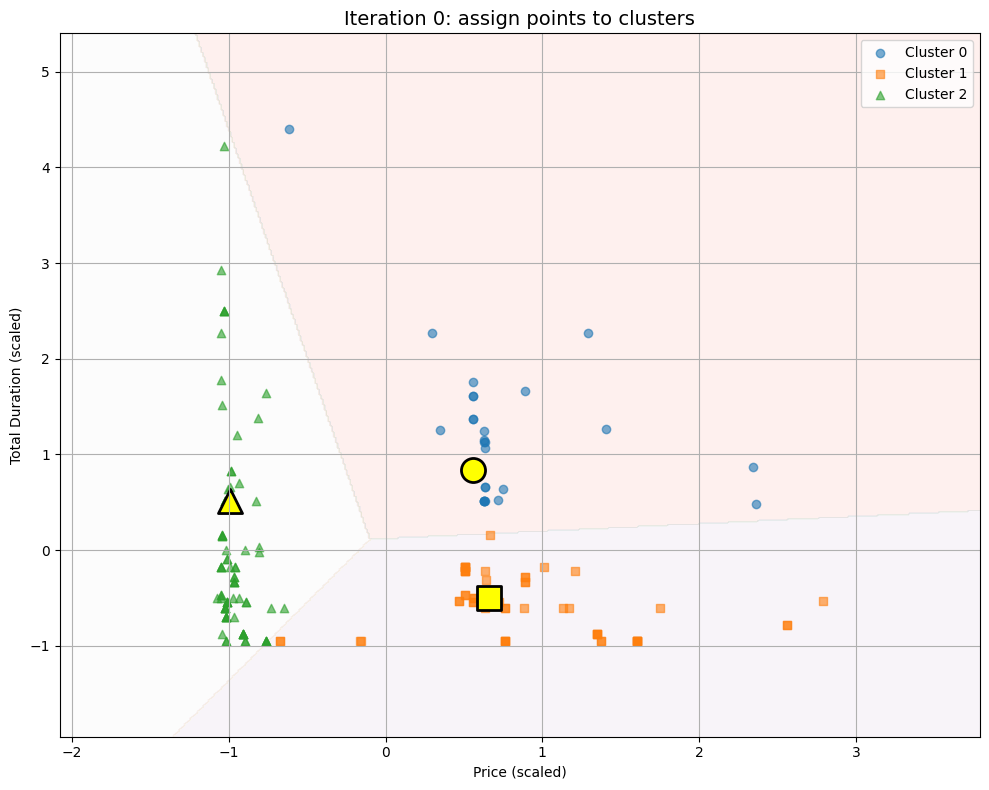

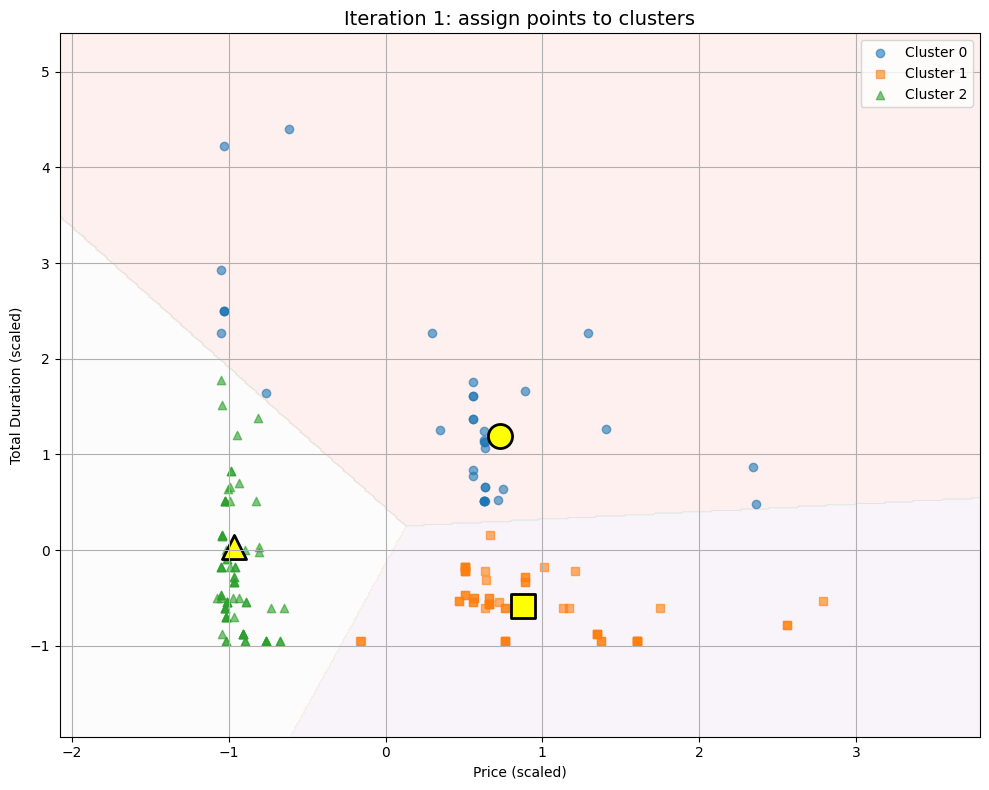

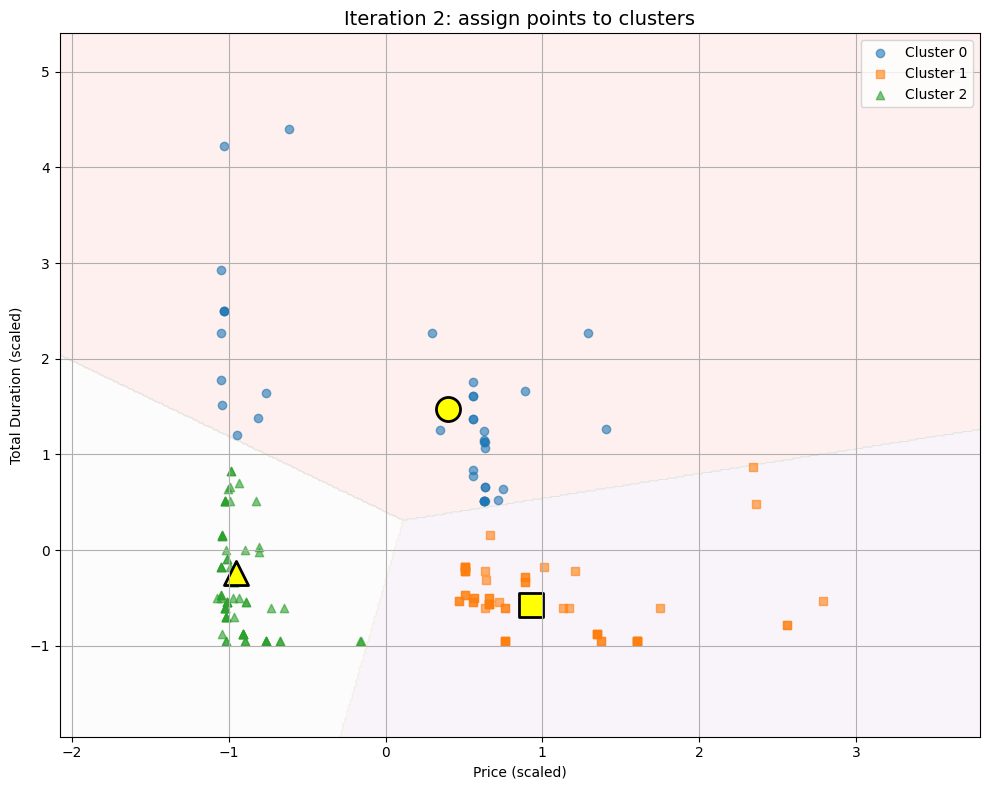

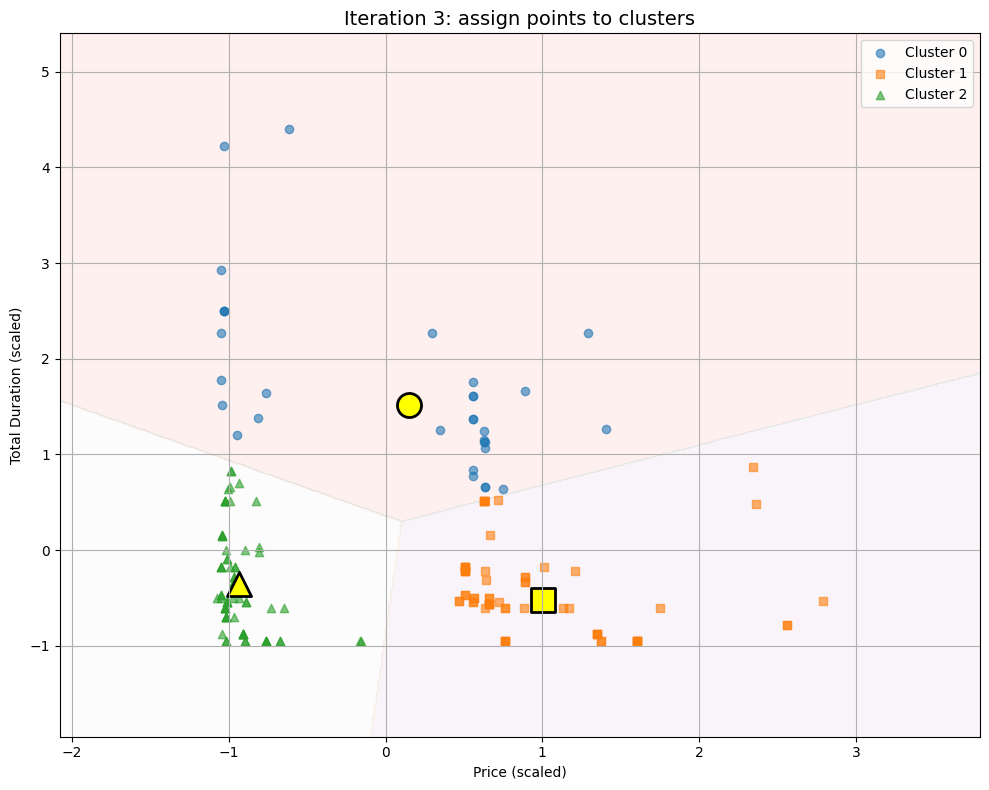

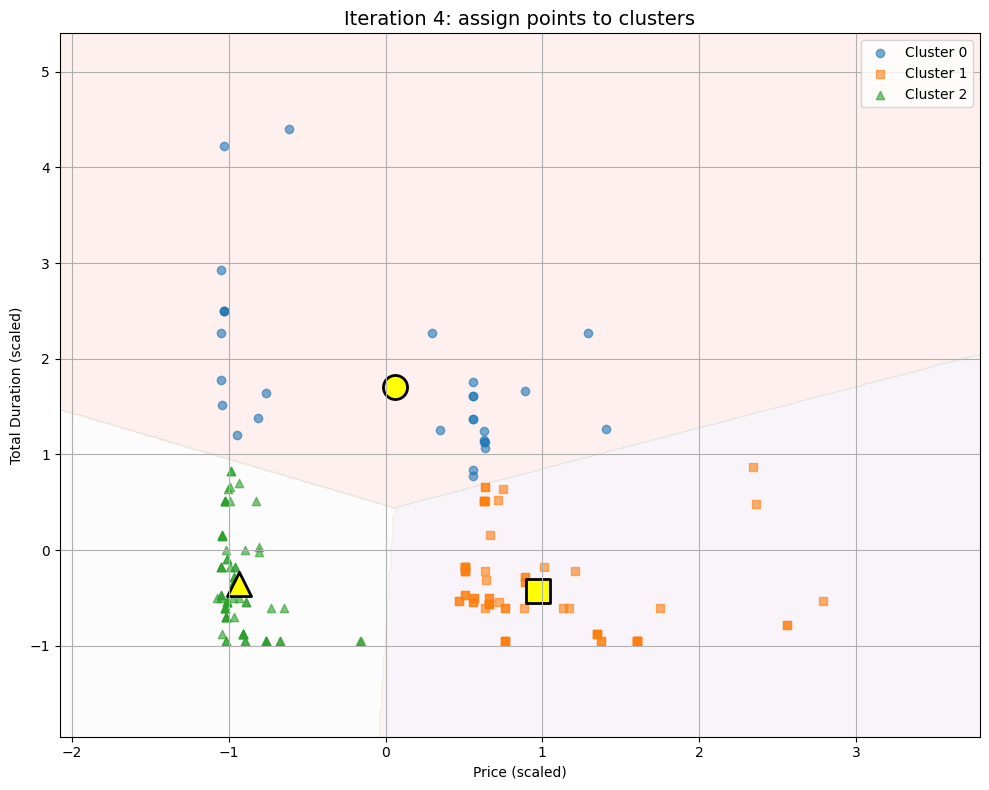

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and scale
X_raw = cleaned_df[['price', 'total_duration']].dropna().values
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# Step-by-step K-Means
def kmeans_step_by_step(X, n_clusters=3, max_iters=5):
    np.random.seed(42)
    # Step 1: Randomly initialize centroids
    centroids = X[np.random.choice(len(X), n_clusters, replace=False)]

    for iteration in range(max_iters):
        # Step 2: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 3: Plot current state
        plot_clusters(X, labels, centroids, iteration)

        # Step 4: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Stop if centroids do not change
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

def plot_clusters(X, labels, centroids, iteration):
    plt.figure(figsize=(10, 8))

    # Color regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]

    distances = np.linalg.norm(grid[:, np.newaxis] - centroids, axis=2)
    Z = np.argmin(distances, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='Pastel1')

    # Plot points
    markers = ['o', 's', '^']
    for i in range(len(centroids)):
        plt.scatter(X[labels == i, 0], X[labels == i, 1],
                    label=f'Cluster {i}', alpha=0.6, marker=markers[i])

    # Plot centroids
    for i, center in enumerate(centroids):
        plt.scatter(center[0], center[1], c='yellow', edgecolor='black',
                    s=300, marker=markers[i], linewidths=2)

    plt.title(f"Iteration {iteration}: assign points to clusters", fontsize=14)
    plt.xlabel("Price (scaled)")
    plt.ylabel("Total Duration (scaled)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the simulation
kmeans_step_by_step(X, n_clusters=3, max_iters=5)
